In [1]:
import pandas as pd

\begin{CD}
   \text{Entrada de dados} @>>> \text{Pré-processamento e Transformações nos dados} \qquad\quad @>>>\\
   @. @VVV @VVV @.\\
    @.{\longrightarrow} \text{Treinamento e Construção do Modelo ML}   @.\text{Dados de Teste}\\
   @.{\Big \uparrow} @VVV @VVV @.\\
   \text{Implementação do Modelo ML} @<<< \text{Teste de Valiação do Modelo} @<<<
\end{CD}

In [79]:
dados = pd.read_csv('./data-set/exames.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [80]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 123143
np.random.seed(SEED)

valores_exames = dados.drop(columns=['id', 'diagnostico'])
diagnostico = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size=0.25) #devo usa stratify=True?

In [4]:
print(treino_x.head())
print(treino_y.head())
print(treino_x.shape,treino_y.shape,teste_x.shape,teste_y.shape)

     exame_1  exame_2  exame_3  exame_4  exame_5  exame_6  exame_7  exame_8  \
114    8.726    15.83    55.84   103.78    230.9  0.11500  0.08201  0.04132   
457   13.210    25.25    84.10   103.78    537.9  0.08791  0.05205  0.02772   
269   10.710    20.39    69.50   103.78    344.9  0.10820  0.12890  0.08448   
520    9.295    13.90    59.96   103.78    257.8  0.13710  0.12250  0.03332   
38    14.990    25.20    95.54   103.78    698.8  0.09387  0.05131  0.02398   

     exame_9  exame_10  ...  exame_24  exame_25  exame_26  exame_27  exame_28  \
114  0.01924    0.1649  ...     64.48     284.4   0.17240   0.23640   0.24560   
457  0.02068    0.1619  ...     91.29     632.9   0.12890   0.10630   0.13900   
269  0.02867    0.1668  ...     76.51     410.4   0.13350   0.25500   0.25340   
520  0.02421    0.2197  ...     67.84     326.6   0.18500   0.20970   0.09996   
38   0.02899    0.1565  ...     95.54     698.8   0.09387   0.05131   0.02398   

     exame_29  exame_30  exame_31  exa

In [5]:
valores_exames.isnull().sum()

exame_1       0
exame_2       0
exame_3       0
exame_4       0
exame_5       0
exame_6       0
exame_7       0
exame_8       0
exame_9       0
exame_10      0
exame_11      0
exame_12      0
exame_13      0
exame_14      0
exame_15      0
exame_16      0
exame_17      0
exame_18      0
exame_19      0
exame_20      0
exame_21      0
exame_22      0
exame_23      0
exame_24      0
exame_25      0
exame_26      0
exame_27      0
exame_28      0
exame_29      0
exame_30      0
exame_31      0
exame_32      0
exame_33    419
dtype: int64

Exame_33 apresenta diversos valores vazios - não numéricos.
Decisão: Remover coluna 33 antes de criar o modelo!

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier

valores_exames = dados.drop(columns=['id', 'diagnostico'])
diagnostico = dados.diagnostico
#Removendo coluna 'exame_33'
valores_exames_v1 = valores_exames.drop(columns='exame_33')

def classificador(modelo, X, Y, test_size=0.3):
    SEED = 123143
    np.random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y, test_size=test_size) #devo usa stratify=True?

    modelo.fit(treino_x, treino_y)

    print(f'Resultado da classificação: {round(modelo.score(teste_x, teste_y) * 100, 2)}%.')
    
classificador(RandomForestClassifier(n_estimators = 100), valores_exames_v1, diagnostico)

Resultado da classificação: 92.4%.


Preciso saber o quão bom está meu modelo, desta forma utilizaremos o DummyClassifier como nosso algoritmo de base de referência.

In [7]:
from sklearn.dummy import DummyClassifier

def dummyclassifier(dummy):
    SEED = 123143
    np.random.seed(SEED)
    dummy.fit(treino_x, treino_y)

    print(f'Resultado algoritmo de base: {round(dummy.score(teste_x, teste_y) * 100, 2)}%.')

dummyclassifier(DummyClassifier(strategy = 'most_frequent'))

Resultado algoritmo de base: 67.13%.


# Estudando  o comportamento dos das variáveis
> Entendendo quais são os valores ( por exemplo o do "exame_1") que caracterizam um resultado como benigno ou maligno;


  diagnostico  exame_1  exame_2  exame_3  exame_4  exame_5  exame_6  exame_7  \
0           M    17.99    10.38   122.80   103.78   1001.0  0.11840  0.27760   
1           M    20.57    17.77   132.90   103.78   1326.0  0.08474  0.07864   
2           M    19.69    21.25   130.00   103.78   1203.0  0.10960  0.15990   
3           M    11.42    20.38    77.58   103.78    386.1  0.14250  0.28390   
4           M    20.29    14.34   135.10   103.78   1297.0  0.10030  0.13280   

   exame_8  exame_9  exame_10  
0   0.3001  0.14710    0.2419  
1   0.0869  0.07017    0.1812  
2   0.1974  0.12790    0.2069  
3   0.2414  0.10520    0.2597  
4   0.1980  0.10430    0.1809  
  diagnostico   exames  valores
0           M  exame_1    17.99
1           M  exame_1    20.57
2           M  exame_1    19.69
3           M  exame_1    11.42
4           M  exame_1    20.29      diagnostico    exames  valores
5685           M  exame_10   0.1726
5686           M  exame_10   0.1752
5687           M  exame_10 

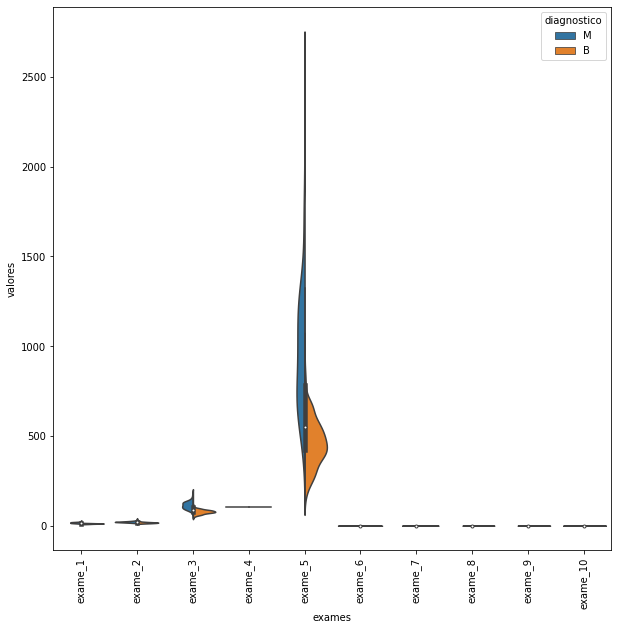

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1) #axis = 1 concatenação de coluna, .iloc[linhas,colunas]: ver no gráfico só os dados de "tanto à tanto"
    print(dados_plot.head())

    dados_plot = pd.melt(dados_plot, id_vars = "diagnostico", var_name = "exames", value_name="valores")
    print(dados_plot.head(),dados_plot.tail())

    plt.figure(figsize=(10,10))
    sns.violinplot(x = "exames", y = "valores", 
                hue = "diagnostico", data = dados_plot, split = True)

    plt.xticks(rotation = 90)

grafico_violino(valores_exames_v1, 0, 10)

Necessita padronização do eixo Y no gráfico acima.

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
  diagnostico   exame_1   exame_2   exame_3       exame_4   exame_5   exame_6  \
0           M  1.097064 -2.073335  1.269934  1.421085e-14  0.984375  1.568466   
1           M  1.829821 -0.353632  1.685955  1.421085e-14  1.908708 -0.826962   
2           M  1.579888  0.456187  1.566503  1.421085e-14  1.558884  0.942210   
3           M -0.768909  0.253732 -0.592687  1.421085e-14 -0.764464  3.283553   
4           M  1.750297 -1.151816  1.776573  1.421085e-14  1.826229  0.280372   

    exame_7   exame_8   exame_9  exame_10  
0  3.283515  2.652874  2.532475  2.217515  
1 -0.487072 -0.023846  0.548144  0.001392  
2  1.052926  1.363478  2.037231  0.939685  
3  3.402909  1.915897  1.451707  2.867383  
4  0.539340  1.371011  1.428493 -0.009560  
  diagnostico   exames   valores
0           M  exame_1  1.097064
1           M  exame_1  1.829821
2           M  exame_1  1.579888
3           M  exame_1 -0.768909
4           M  exame_1

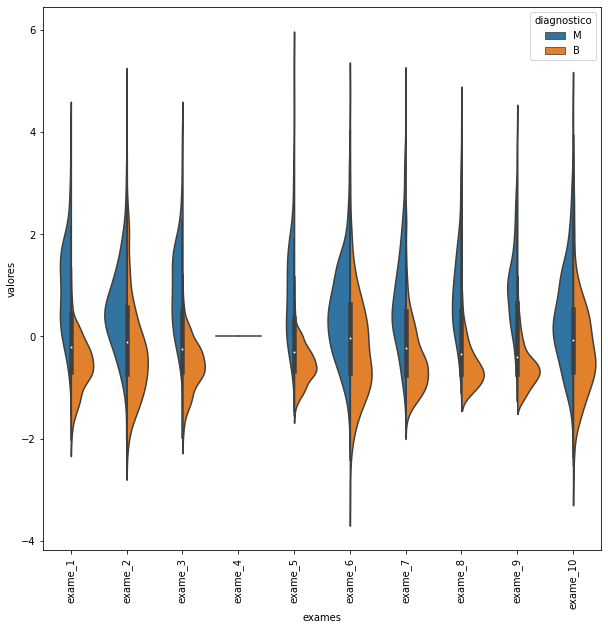

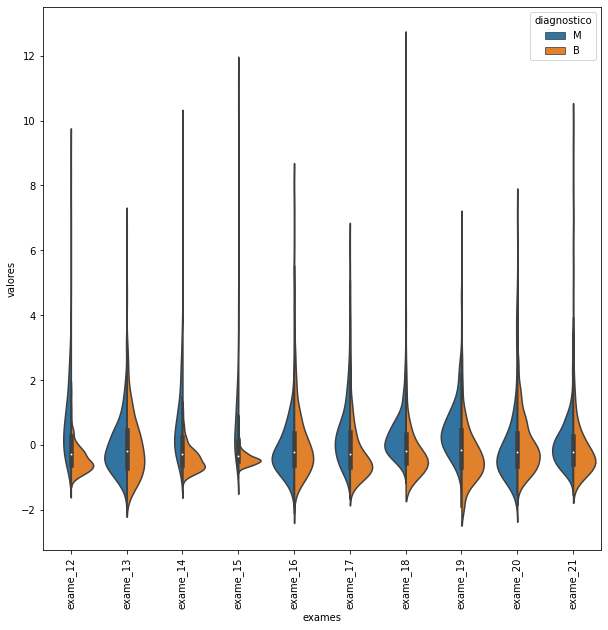

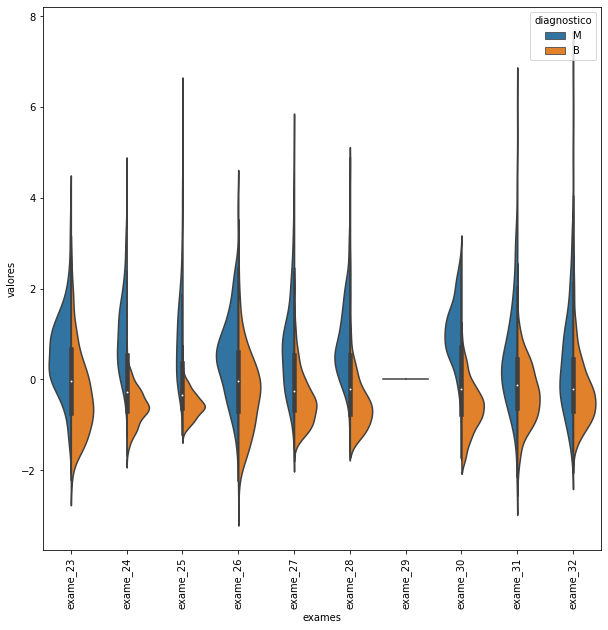

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
print(type(valores_exames_v2))       #obseva-se que é um um array numpy, preciso transformarm em metadata pandas

valores_exames_v2 = pd.DataFrame(data= valores_exames_v2, columns=valores_exames_v1.keys())
print(type(valores_exames_v2))

grafico_violino(valores_exames_v2, 0, 10)    
grafico_violino(valores_exames_v2, 11, 21) 
grafico_violino(valores_exames_v2, 22, 32) 

# O que foi observado a partir do gráfico acima?

> a) o exame_4 está com problemas;

> b) o exane_2 é um bom teste para diferenciar o resultado é Maligno (M) ou Benigno (B). Veja as picos 'azuis' e 'laranjas bem separados, o azul está acima do 0 normalizado, enquanto o laranja está abaixo de 0

> c) já o exame_10 é um teste ruim... tanto o pico laranja quanto azul tem basicamente o mesmo valor.

In [10]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])

In [11]:
classificador(RandomForestClassifier(n_estimators = 100), valores_exames_v3, diagnostico)

Resultado da classificação: 91.81%.


  diagnostico   exame_1   exame_2   exame_3   exame_5   exame_6   exame_7  \
0           M  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515   
1           M  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072   
2           M  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926   
3           M -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909   
4           M  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340   

    exame_8   exame_9  exame_10  exame_11  
0  2.652874  2.532475  2.217515  2.255747  
1 -0.023846  0.548144  0.001392 -0.868652  
2  1.363478  2.037231  0.939685 -0.398008  
3  1.915897  1.451707  2.867383  4.910919  
4  1.371011  1.428493 -0.009560 -0.562450  
  diagnostico   exames   valores
0           M  exame_1  1.097064
1           M  exame_1  1.829821
2           M  exame_1  1.579888
3           M  exame_1 -0.768909
4           M  exame_1  1.750297      diagnostico    exames   valores
5685           M  exame_11 -0.931027
5

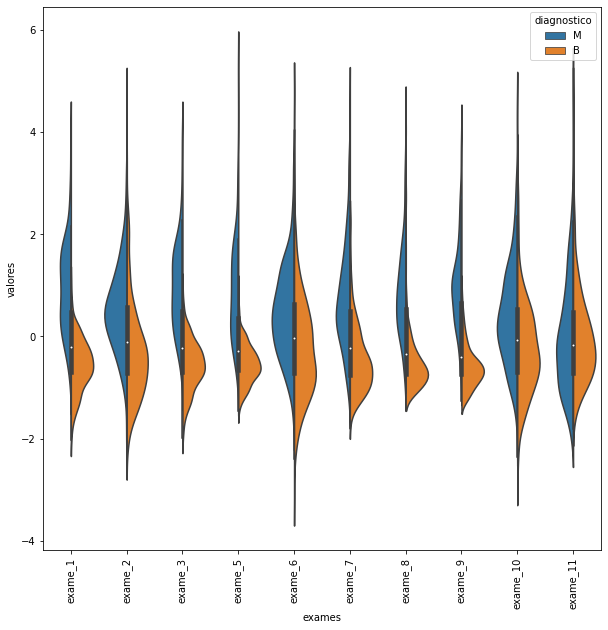

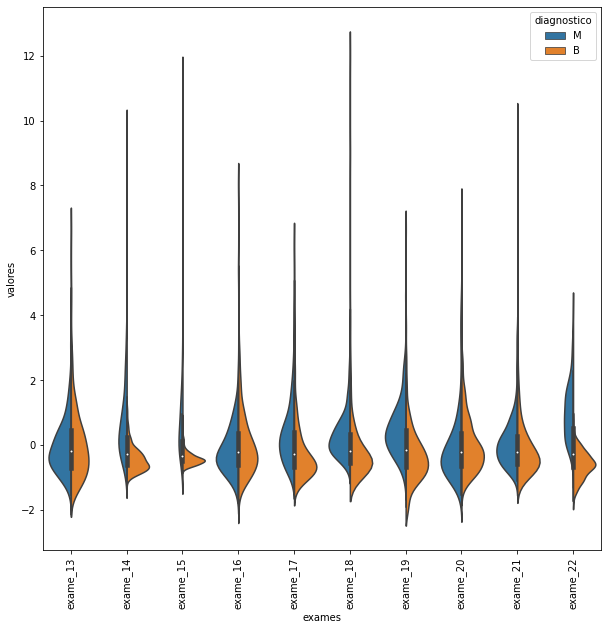

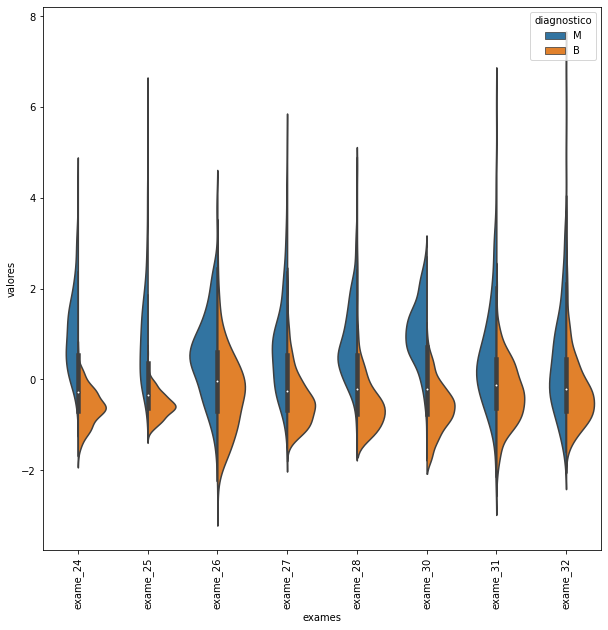

In [12]:
grafico_violino(valores_exames_v3, 0, 10)    
grafico_violino(valores_exames_v3, 11, 21) 
grafico_violino(valores_exames_v3, 22, 32) 

# Qual a correlação dos dados?

In [13]:
matriz_corr = valores_exames_v3.corr()
matriz_corr

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

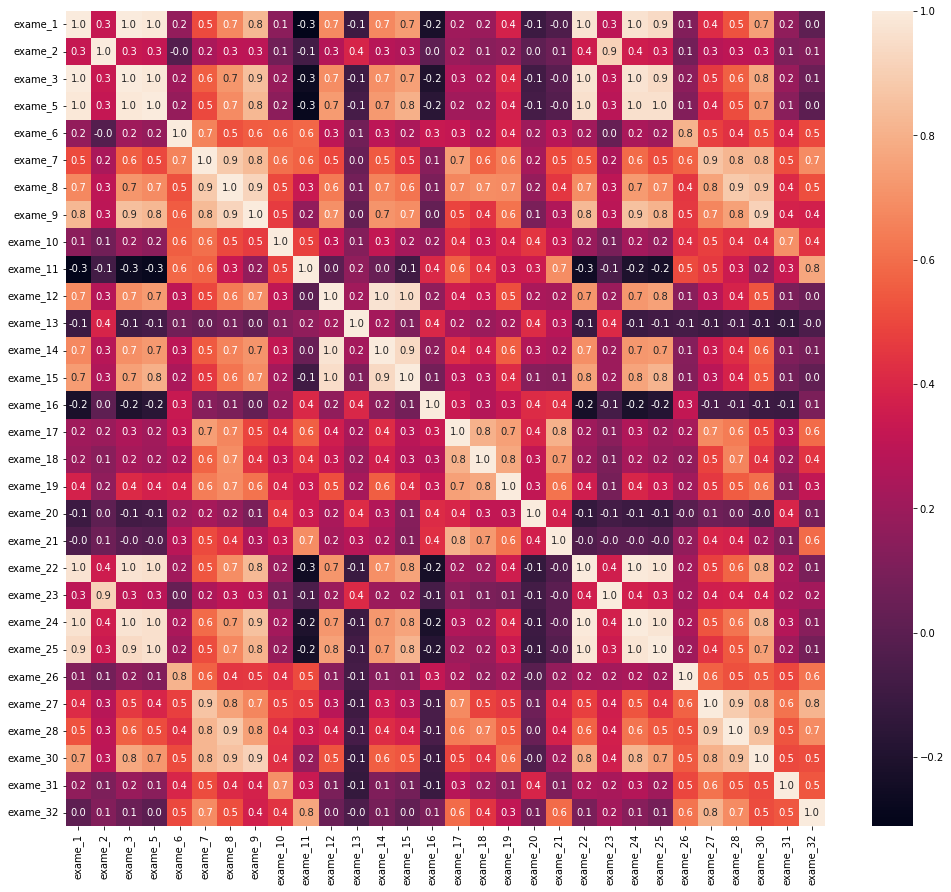

In [14]:
plt.figure(figsize=(17,15))
sns.heatmap(matriz_corr, annot = True, fmt = '.1f')


Analisando o resultado, é possível encontrar diversas features totalmente correlacionadas, com valores iguais a 1.0, e outras com um valor bem próximo, como 0.9. Enquanto isso, também temos features pouquíssimo correlacionadas, com valores próximos a 0.0

In [15]:
matriz_corr_v1 = matriz_corr[matriz_corr > 0.99]
matriz_corr_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
matriz_corr_v2 = matriz_corr_v1.sum()
matriz_corr_v2  # se > 1, altamente corretacionado

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [17]:
variaveis_altamente_correlacionadas = matriz_corr_v2[matriz_corr_v2 > 1]
variaveis_altamente_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

criaremos uma variável valores_exames_v4 que receberá o dataframe valores_exames_v3 após a remoção das colunas listadas em variaveis_correlacionadas

In [18]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys())

In [19]:
classificador(RandomForestClassifier(n_estimators = 100), valores_exames_v4, diagnostico)

Resultado da classificação: 93.57%.


# "Erro" observado:

A fim de diminuir o número de variáveis na suposta base de dados, o que podemos fazer com dados de alta correlação? Como resposta, os dados apresentam uma alta correlação, podemos remover uma das variáveis, pois quanto mais alta a correlação entre as variáveis tem-se informação duplicada, o que pode contribuir mais com viés no modelo de classificação.

A partir da afirmação acima, nós descobrimos quais variáveis estavam correlacionadas e excluímos todas elas, mas na verdade não era isso que deveríamos ter feito.

Voltando a analisar a matriz de correlação, é observado que as features "exame_1" e "exame_3" estão totalmente correlacionadas, da mesma forma que "exame_22" e "exame_24". Sendo assim, removeremos "apenas uma feature de cada um desses pares" - no caso, "exame_3" e "exame_24", e criaremos um novo dataframe valores_exames_v5 sem elas

In [20]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificador(RandomForestClassifier(n_estimators = 100), valores_exames_v5, diagnostico)

valores_exames_v5_2 = valores_exames_v3.drop(columns=["exame_1", "exame_22"])
classificador(RandomForestClassifier(n_estimators = 100), valores_exames_v5_2, diagnostico)

Resultado da classificação: 92.98%.
Resultado da classificação: 92.98%.


Entretanto, observa-se que o resultado de valores_exames_v5 e valores_exames_v5_2 foram levemente piores que valores_exames_v4

Observação: 
> Temos que ter bastante cuidado ao analisarmos correlações, pois podemos tirar certas conclusões que às vezes não fazem muito sentido. Por exemplo, poderíamos ter concluído que, como "exame_1" e "exame_3" estão altamente correlacionados, o alto valor de "exame_3" é causado por "exame_1". Porém, a associação de correlação e causalidade nem sempre é verdadeira.

> Tomar cuidado com "correlações falaciosas" 

# Nova estratégia para melhor classificação:

> O SKlearn possui um método SelectKBest() que é uma maneira de selecionarmos um determinado número ("k") de melhores features desse conjunto. Em suma, geramos uma pontuação para cada feature (cada exame) e selecionar as melhores dentre elas.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Observação: além de um número k de features, precisaremos passar a função matemática que 
# deverá ser utilizada. Uma função muito utilizada é o Qui-quadrado, que usaremos para inferir
# quais features serão mais representativas para nosso processo de classificação.

selecionar_kmelhores = SelectKBest(chi2, k=5)
# utilizaremos 5 como valor de k. Ou seja, de exames que eram realizados para chegar a um 
# diagnóstico, queremos realizar apenas 5, mantendo a qualidade de predição do nosso algoritmo.
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x000001ACFF159EA0>)

In [22]:
SEED = 1234
np.random.seed(SEED)

valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

treino_x, teste_x, treino_y, teste_y  = train_test_split(valores_exames_v6,
                                                        diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

teste_kbest.shape

(171, 5)

In [24]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(treino_kbest, treino_y)
print(f'Resultado da classificação KBest: {round(classificador.score(teste_kbest, teste_y) * 100, 2)}%.')


Resultado da classificação: 92.4%.


> Foram removidos um volume muito grande de informações, e não sabemos exatamente qual o impacto disso. Será que estamos acertando mais quando? Ou errando mais?

> Podemos analisar isso por meio de uma matriz de confusão, representada no SKlearn pela função confusion_matrix()

> Essa função nos retorna uma matriz na qual os elementos i são os valores reais e os elementos j são os valores de predição. Como parâmetros, ela recebe os valores reais (y_true) e os valores preditos (y_pred)

In [25]:
from sklearn.metrics import confusion_matrix

matriz_de_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [26]:
matriz_de_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 56.5, 'Predição'), Text(74.5, 0.5, 'Real')]

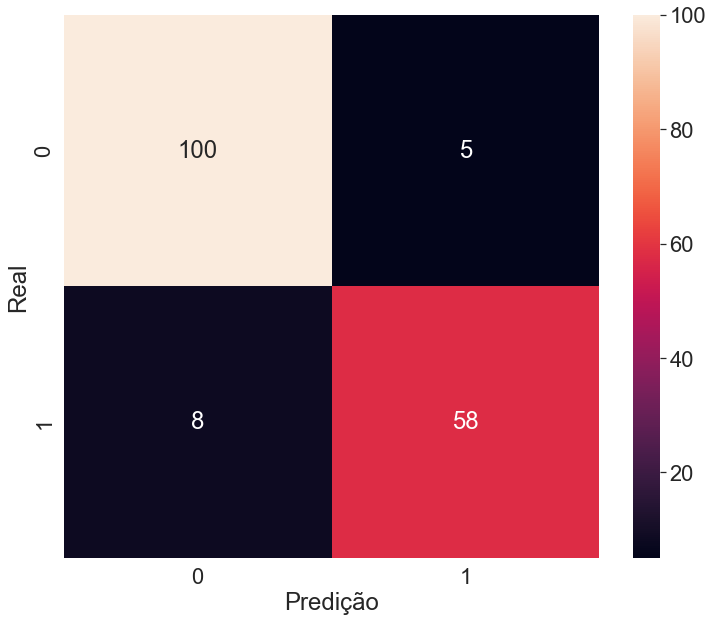

In [30]:
plt.figure(figsize=(12,10))
sns.set(font_scale = 2)
sns.heatmap(matriz_de_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")

> O eixo Y está representando nossos valores reais, e o eixo X representa os valores de predição;

> Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno; A soma dos dois quadrados superiores nos trará o total de cânceres diagnosticados como benignos, e a dos dois quadrados inferiores o total de cânceres diagnosticados como malignos.

> De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos.

# Seleção com RFE - Recursive Feature Elimination (Eliminação de Feature por Recursão)
>  Por meio do calculo da  acurácia nosso classificador saberá qual das features é mais importante pra ele, descartando as de menor acurácia. Esse processo será feito recursivamente até atingir o número de features selecionado $k$.

Resultado da classificação RFE: 90.06%.


[Text(0.5, 56.5, 'Predição'), Text(74.5, 0.5, 'Real')]

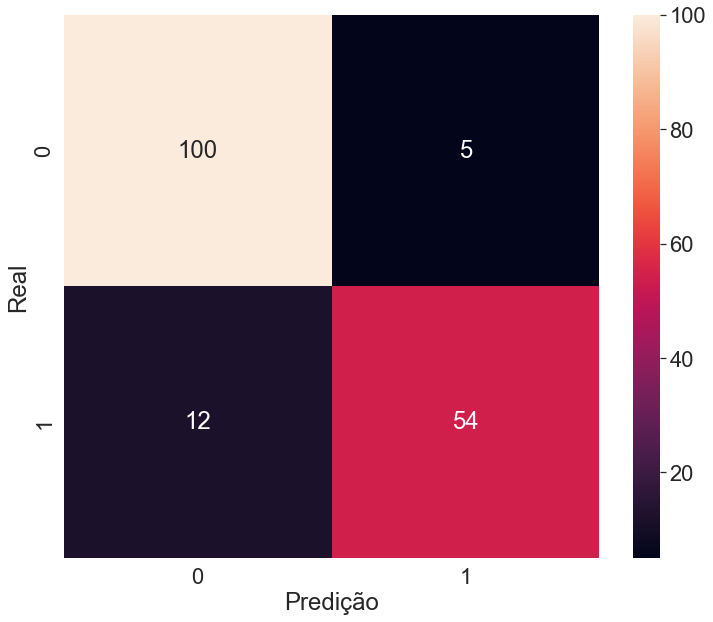

In [35]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y  = train_test_split(valores_exames_v6,
                                                        diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print(f'Resultado da classificação RFE: {round(classificador.score(teste_rfe, teste_y) * 100, 2)}%.')

matriz_de_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(12,10))
sns.set(font_scale = 2)
sns.heatmap(matriz_de_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")

SelectKBest foi melhor que o RFE neste caso

Em resumo: Quais as diferenças entre os métodos automatizados (SelectKbest e REF) e as formas analíticas (Detecção de valores não preenchidos, valores constantes e correlacionados)?
> O método automatizado necessita do número de atributos que serão mantidos e depende de alguma forma de avaliação para cada atributo, por exemplo: o SelectKbest que utiliza uma função para gerar uma pontuação dos atributos (features), assim selecionando os K melhores. Métodos análiticos identificam certos aspectos nos dados como correlação entre os atributos, valores constantes e valores vazios, para então tratar manualmente os respectivos atributos.

# RFECV (RFE Cross Validation)

> É uma técnica que nos informa qual conjunto de features gerará o melhor resultado;

> O RFECV divide o nosso banco de dados em blocos e aplica o algoritmo RFE, que acabamos de aprender, em cada um desses blocos, gerando diferentes resultados. Dessa forma, O RFECV não só nos informa quantas features precisamos ter para gerar o melhor resultado possível, como também quais features são essas.

Resultado da classificação RFECV: 92.98%.


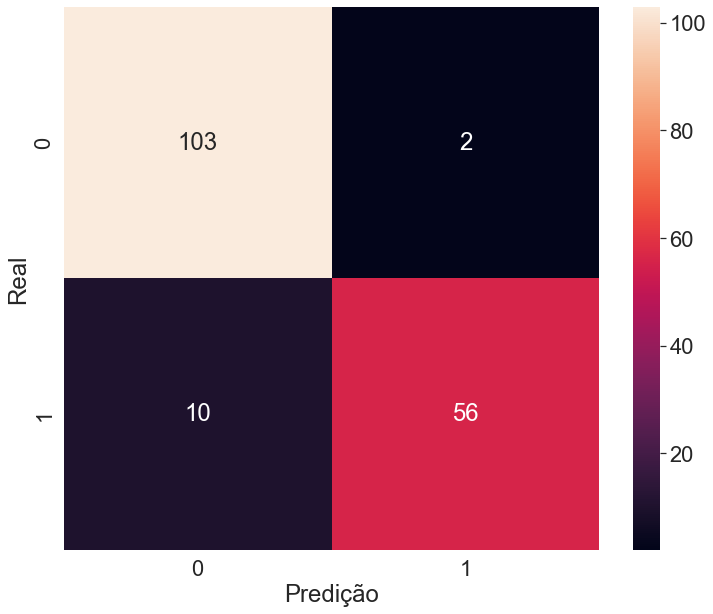

In [37]:
from sklearn.feature_selection import RFECV

SEED = 1234
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y  = train_test_split(valores_exames_v6,
                                                        diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring = "accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)

matriz_de_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(12,10))
sns.set(font_scale = 2)
sns.heatmap(matriz_de_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")

print(f'Resultado da classificação RFECV: {round(classificador.score(teste_rfecv, teste_y) * 100, 2)}%.')

In [38]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [63]:
selecionador_rfecv.grid_scores_
#tenho 5 dimensões no meu banco

array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

In [60]:
mean_grid_scores = selecionador_rfecv.grid_scores_.mean(axis = 1)
mean_grid_scores

C:\Users\Pichau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

Porque foram selecionadas essas features?

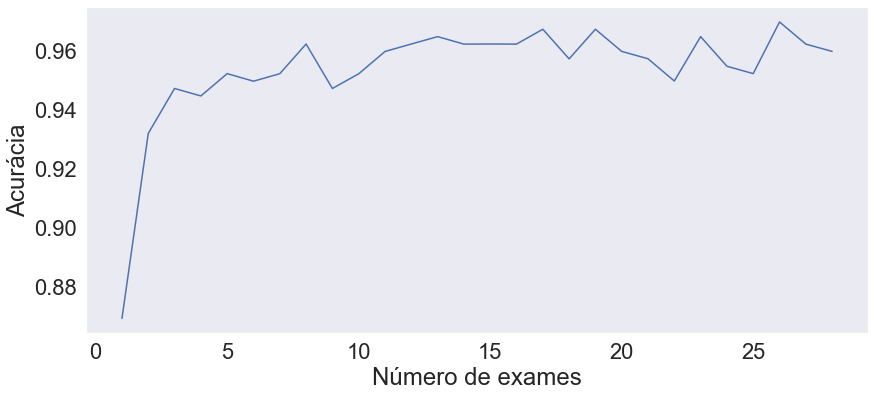

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 6))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.grid()
plt.plot(range(1, len(mean_grid_scores) + 1), mean_grid_scores)
plt.show()

Resultado da classificação RFE: 87.13%.


[Text(0.5, 56.5, 'Predição'), Text(74.5, 0.5, 'Real')]

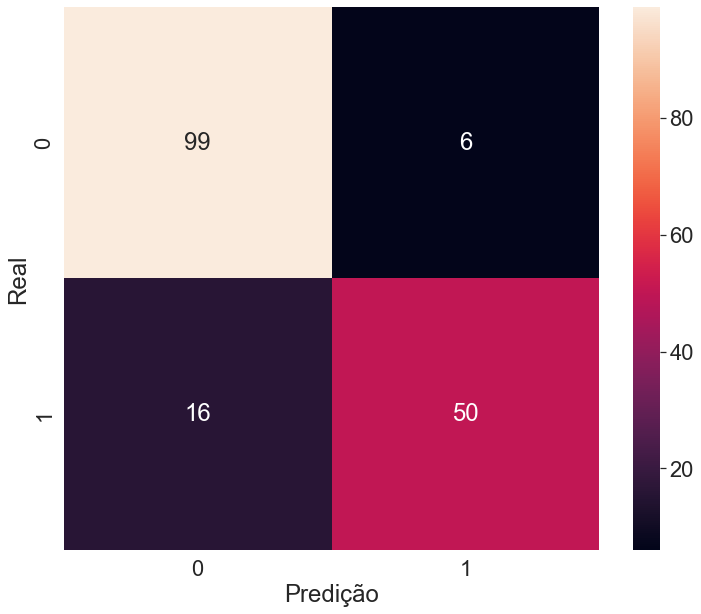

In [64]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y  = train_test_split(valores_exames_v6,
                                                        diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print(f'Resultado da classificação RFE: {round(classificador.score(teste_rfe, teste_y) * 100, 2)}%.')

matriz_de_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(12,10))
sns.set(font_scale = 2)
sns.heatmap(matriz_de_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")

In [69]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

In [70]:
valores_exames_v7.shape  # modificados para 2 dimensões

(569, 2)

<AxesSubplot:>

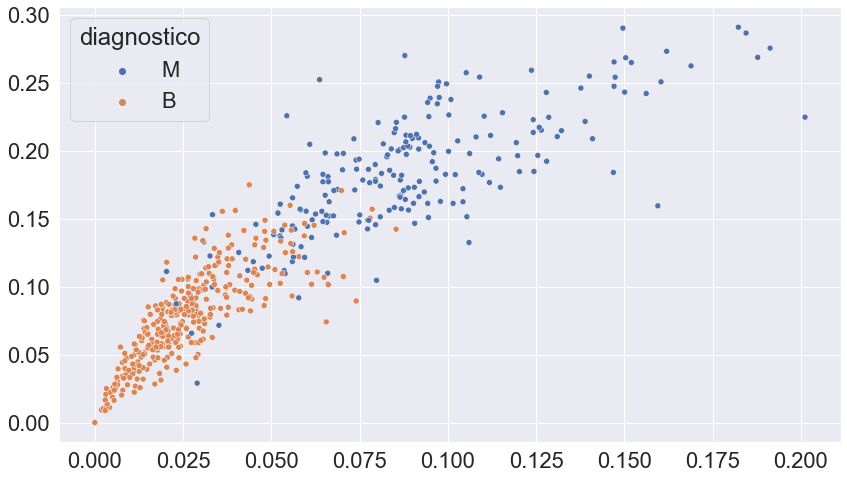

In [68]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

# Resultado da análise com duas dimensões apenas

> Teremos como resultado um gráfico de distribuição no qual cada ponto laranja é um câncer benigno e cada ponto azul é um câncer maligno. Porém, tendo excluído dimensões até restarem apenas duas, não estamos perdendo muita informação? Na verdade sim. Sendo assim, no caso de visualizações desse tipo, selecionar apenas duas features não é o mais adequado. Precisaremos encontrar uma maneira de preservar as características que irão diferenciar os tipos de câncer.

# Técnica PCA

> Técnica de decomposição para manter o máximo de informações possível em dimensionalidades reduzidas;

> Opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação

<AxesSubplot:>

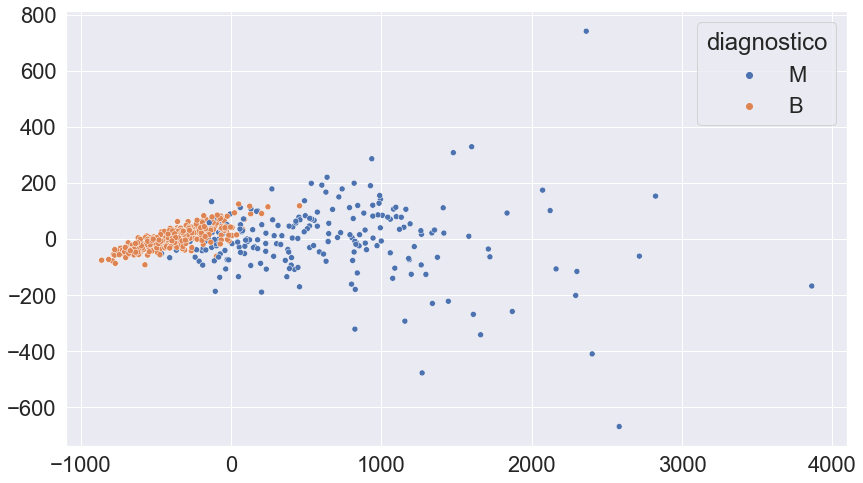

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

 Analisando os resultados da transformação ainda não temos uma visualização que pode ser analisada em detalhes...

In [72]:
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

 > Observa-se que os valores_exames_v6 utiliza a nossa base de dados original, sem uma padronização dos valores, e o PCA se comporta melhor com os dados já normalizados;

 > Então, o invés de aplicarmos a transformação em valores_exames_v6, aplicaremos em valores_exames_v5, temos:

<AxesSubplot:>

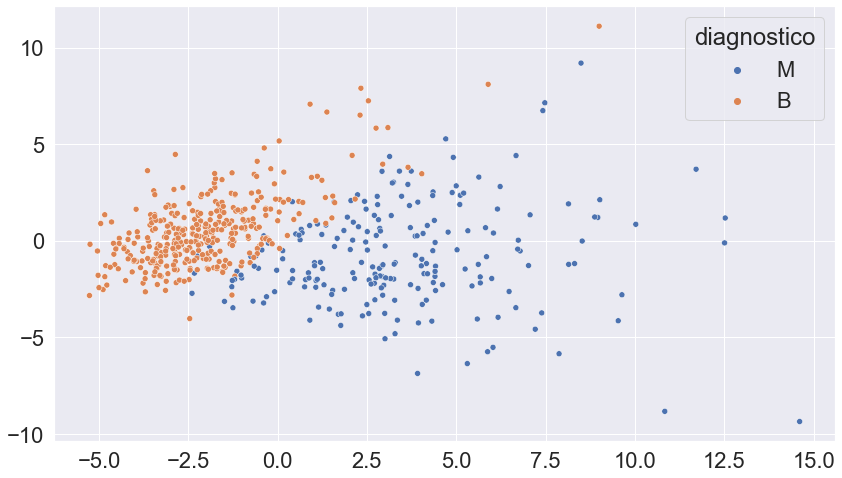

In [73]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

> Dessa forma, conseguiremos enxergar de maneira mais clara, é até possível traçar uma linha que dividirá os cânceres dos tipos maligno ou benigno..interessante...

# Técnica $t$-SNE

> e comporta melhor quando queremos gerar visualizações. A t-SNE tenta manter as distâncias entre os pontos.


In [76]:
valores_exames_v5

569


,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


> Por exemplo: calcularndo a distância entre o ponto 0 e o ponto 1, teremos um valor em 28 dimensões, que é a quantidade de features do nosso conjunto. O t-SNE tenta manter a proporção dessas distâncias na redução para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.

C:\Users\Pichau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Pichau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

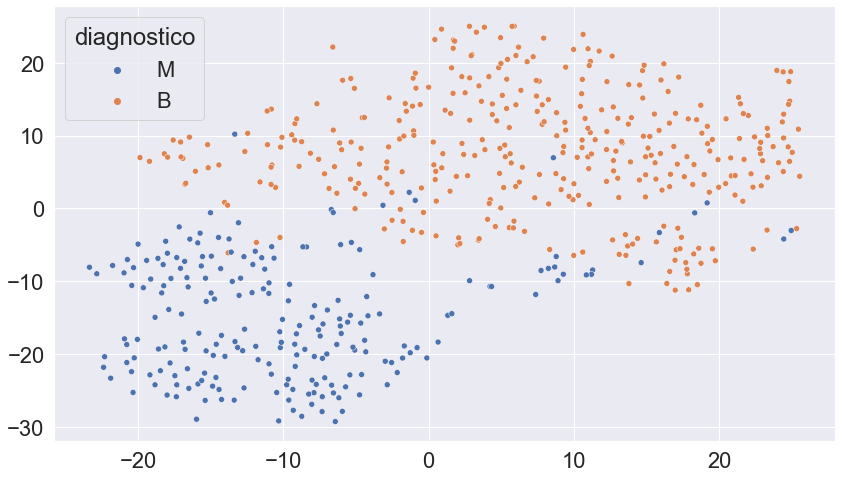

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)